In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks'?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LS

In [11]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [12]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [14]:
#for reading stock data from yahoo 
from pandas_datareader.data import DataReader
import yfinance as yf

#for time stamps
from datetime import datetime

In [15]:
#the tech stocks we'll use for this analysis 
tech_list = ['AAPL','GOOG','MSFT','AMZN']

#set up end and start times for data grap 
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

for stock in tech_list :
    #globals() is a sloppy way of setting the DataFrame names, but its simple
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
#for company, company_name in zip(company_list, tech_list):
    #company["company_name"] = company_name

In [17]:
#play aorund with DataFrame to get a feel for the data
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-21 00:00:00-04:00,122.489998,123.760002,118.449997,118.540001,118.540001,58498900,AMAZON
2022-09-22 00:00:00-04:00,117.080002,118.790001,116.260002,117.309998,117.309998,55229200,AMAZON
2022-09-23 00:00:00-04:00,116.000000,116.050003,112.059998,113.779999,113.779999,65081200,AMAZON
2022-09-26 00:00:00-04:00,113.300003,117.339996,113.129997,115.150002,115.150002,62723300,AMAZON
2022-09-27 00:00:00-04:00,117.199997,118.320000,113.050003,114.410004,114.410004,60094700,AMAZON
2022-09-28 00:00:00-04:00,114.379997,118.699997,113.800003,118.010002,118.010002,55763800,AMAZON
2022-09-29 00:00:00-04:00,115.599998,116.070000,113.059998,114.800003,114.800003,58969700,AMAZON
2022-09-30 00:00:00-04:00,114.080002,116.919998,112.839996,113.000000,113.000000,59409800,AMAZON
2022-10-03 00:00:00-04:00,113.580002,116.910004,112.449997,115.879997,115.879997,50884400,AMAZON


In [18]:
#summary stats 
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,158.377273,160.472806,156.505691,158.576957,158.162663,8.912308e+07
std,12.474049,12.391312,12.363874,12.358404,12.279305,2.684835e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,3.143428e+07
25%,148.809998,150.130005,147.479996,148.960007,148.503723,7.017050e+07
50%,159.570007,161.800003,156.529999,159.220001,158.845657,8.444270e+07
75%,169.080002,171.050003,167.139999,168.880005,168.490005,1.017869e+08
max,182.630005,182.940002,179.119995,182.009995,181.259933,1.954327e+08


In [19]:
#genral info 
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-10-04 00:00:00-04:00 to 2022-10-04 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


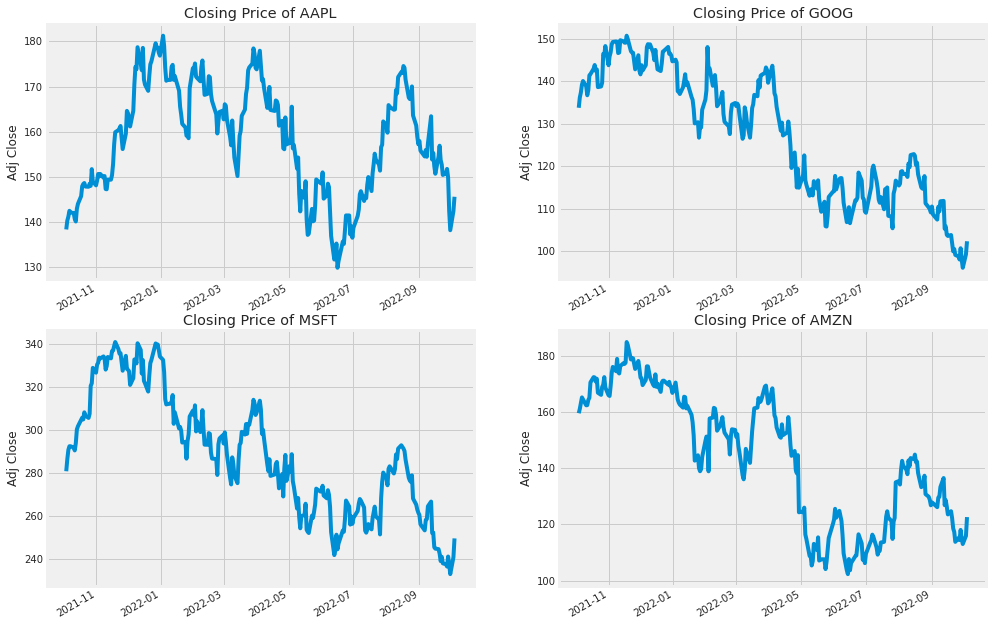

In [20]:
#let's see a historical view of the closing price 

plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.5, bottom=1.2)

for i , company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")
    

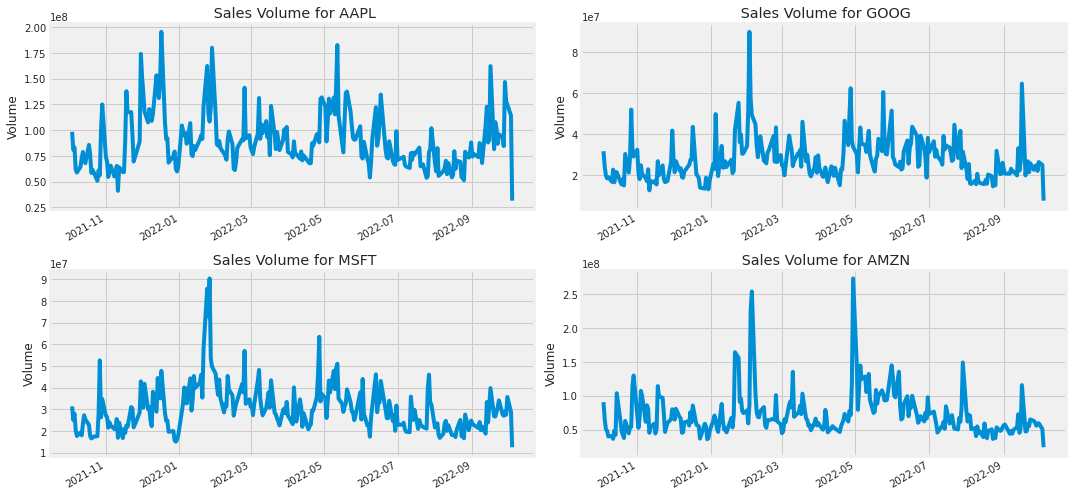

In [21]:
# Now let's plot the total volume of stock being traded each data
plt.figure(figsize = (15,7))
plt.subplots_adjust(top = 1.5 ,bottom = 1.2)

for i , company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f" Sales Volume for {tech_list[i-1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock

### What was the moving average of the various stocks?

In [22]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [23]:
#print(GOOG.columns)

Now let's go ahead and plot all the additional Moving Averages

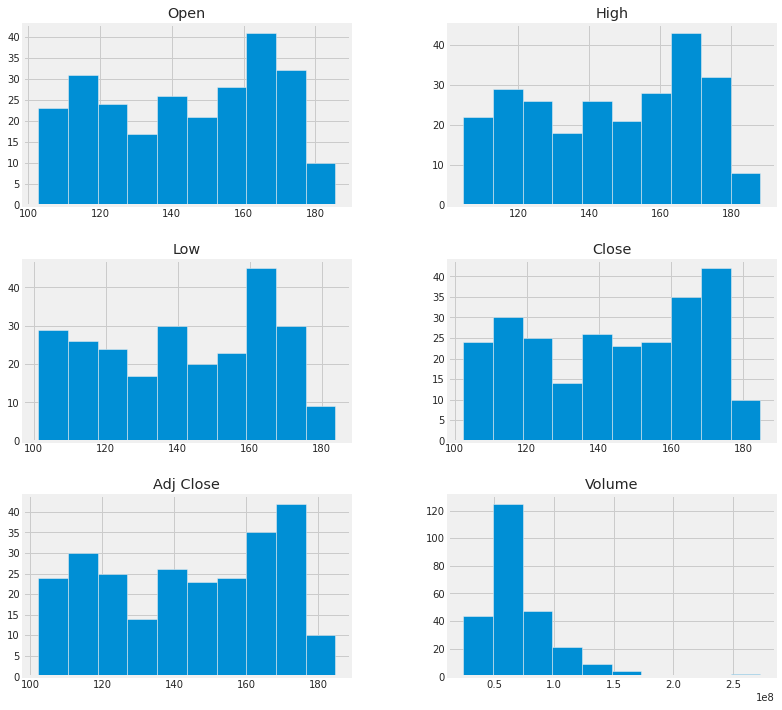

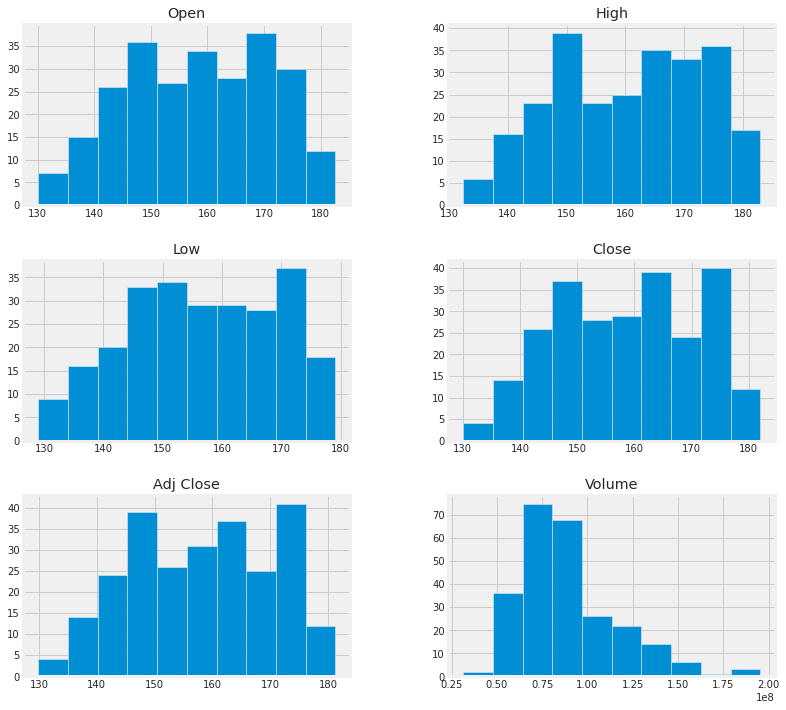

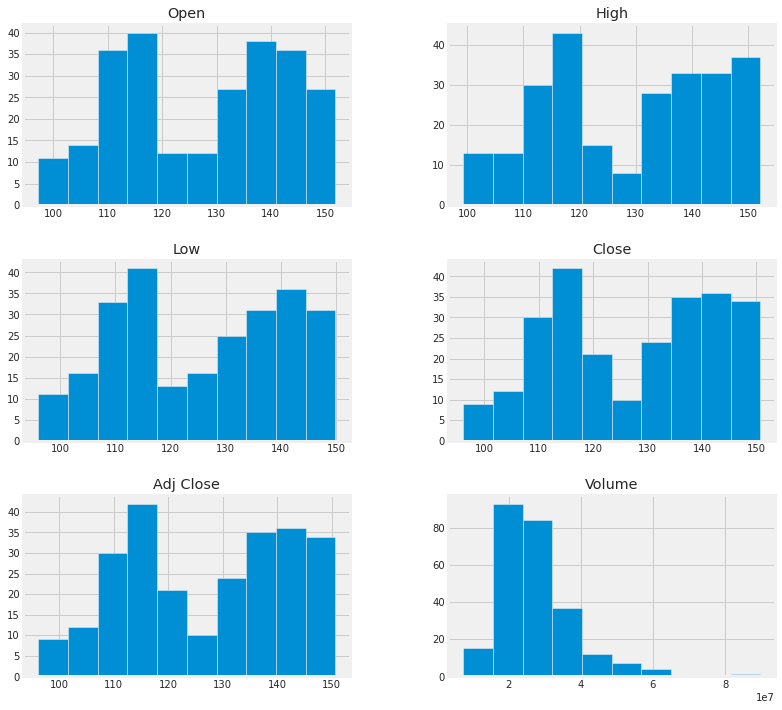

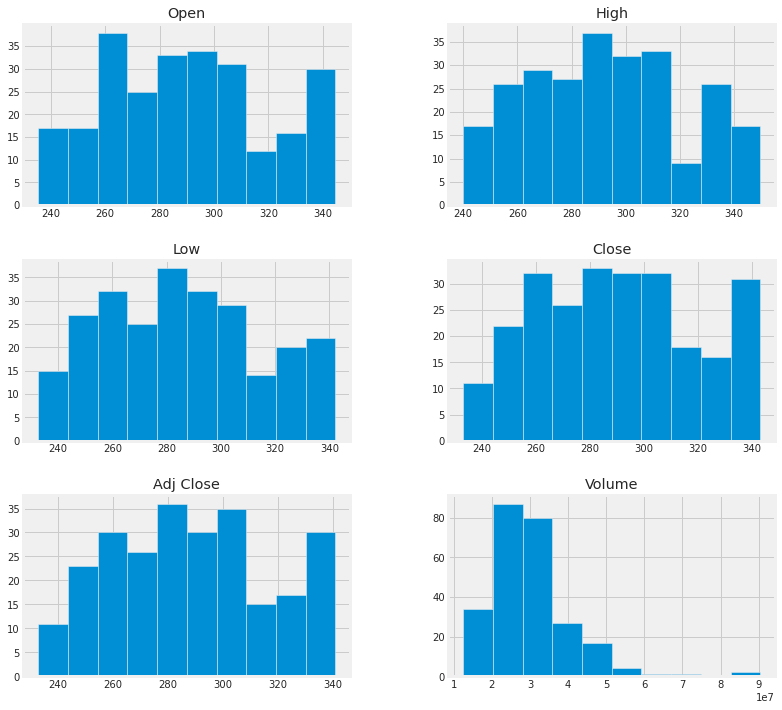

In [24]:
df.groupby("company_name").hist(figsize=(12, 12));


Text(0.5, 1.0, 'AMAZON')

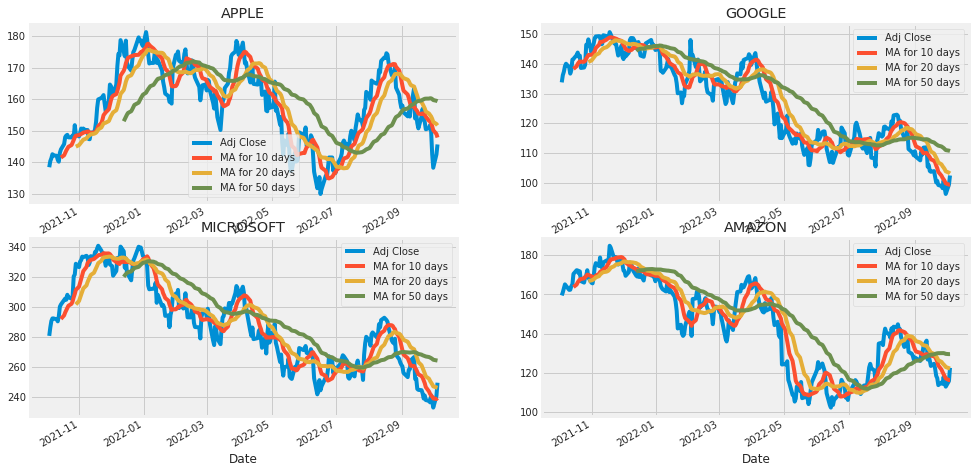

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

### What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

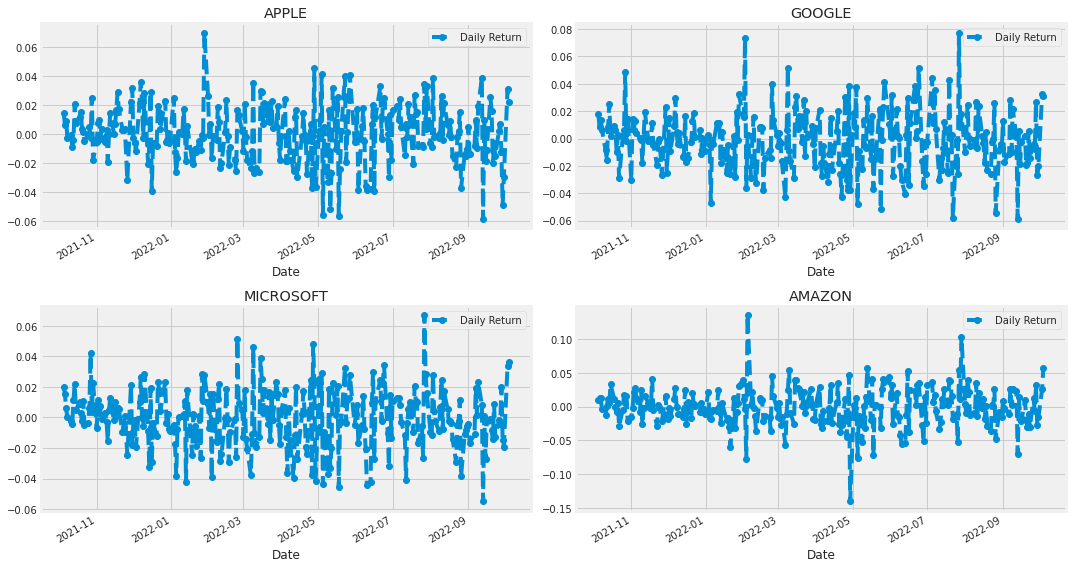

In [26]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

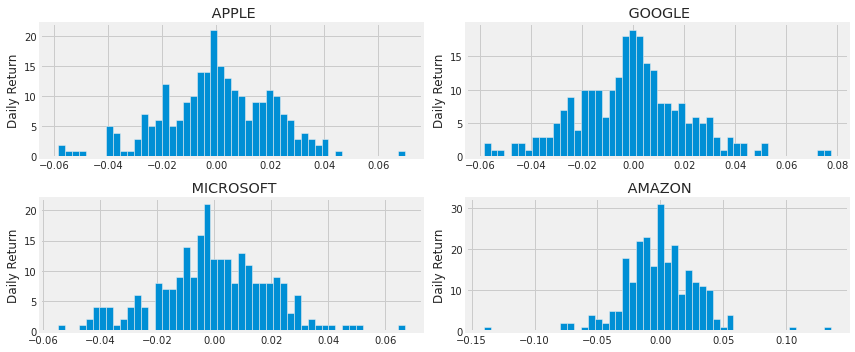

In [27]:
plt.figure(figsize = (12,5))
for i , company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins = 50)
    plt.ylabel('Daily Return')
    plt.xlabel(None)
    plt.title(f" {company_name[i-1]}")
    
plt.tight_layout()

### What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [28]:
# Grab all the clossing prices for the tech sorck list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo' , start ,end)["Adj Close"]

# let's take a quick look 
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-10-04,138.364655,133.764999,280.758606,159.488998
2021-10-05,140.323669,136.177002,286.361725,161.050003
2021-10-06,141.208740,137.354004,290.675537,163.100494
2021-10-07,142.491531,139.185501,292.401154,165.121506
2021-10-08,142.103699,140.056000,292.401154,164.431000


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [29]:
# make a new tech returns Dataframe 
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-10-04,NaN,NaN,NaN,NaN
2021-10-05,0.014158,0.018032,0.019957,0.009788
2021-10-06,0.006307,0.008643,0.015064,0.012732
2021-10-07,0.009084,0.013334,0.005937,0.012391
2021-10-08,-0.002722,0.006254,0.000000,-0.004182


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

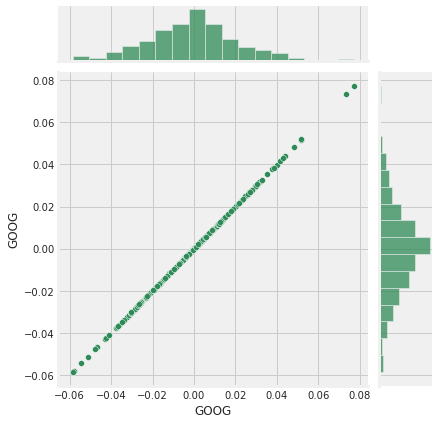

In [30]:
# Comparing coogle to itself should show a perfectly linear relationship 
sns.jointplot(x='GOOG' ,y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

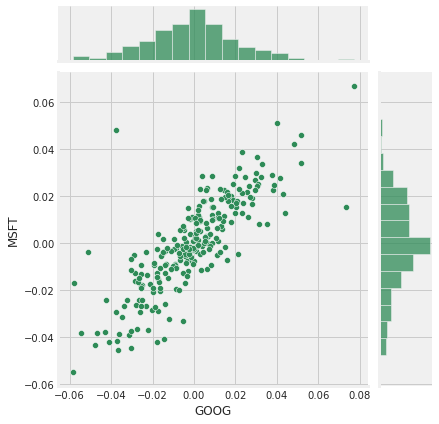

In [31]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG' ,y='MSFT', data=tech_rets, kind='scatter', color='seagreen')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

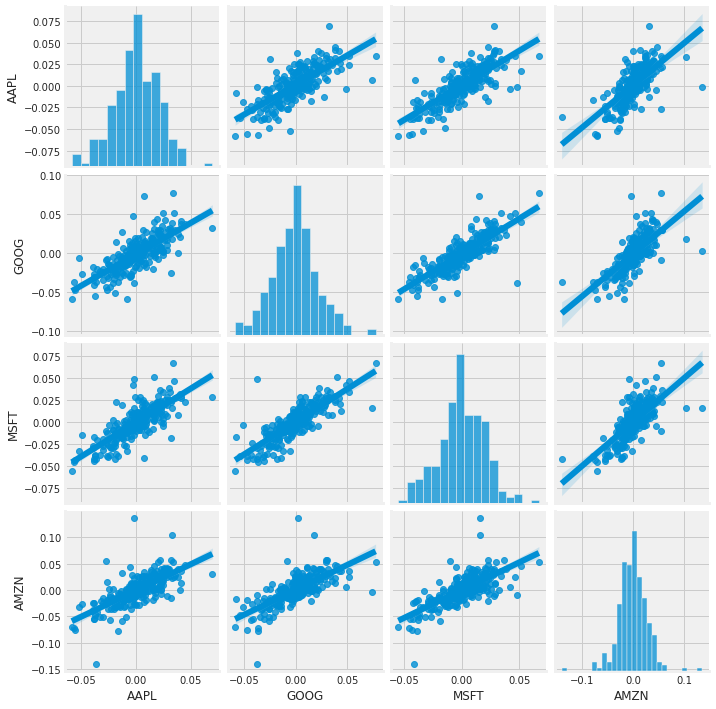

In [32]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons
sns.pairplot(tech_rets, kind ='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

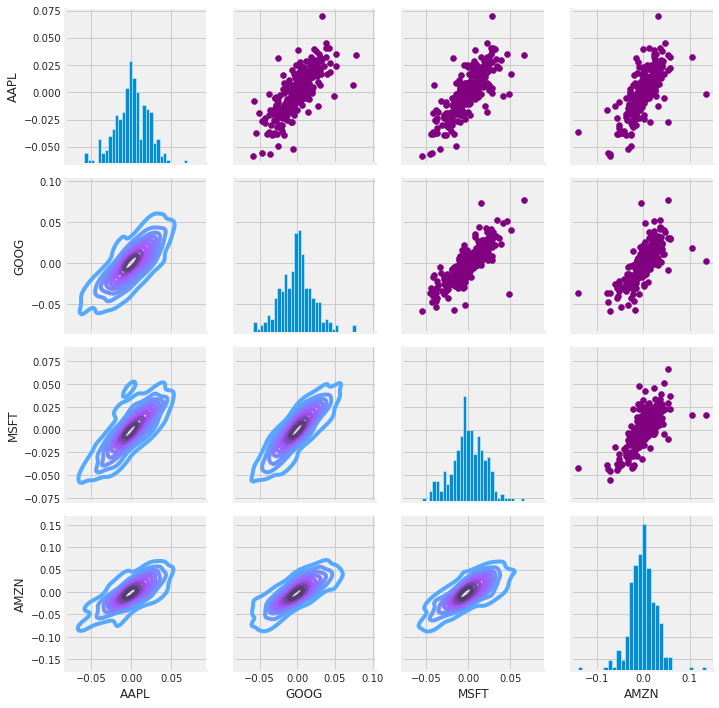

In [33]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

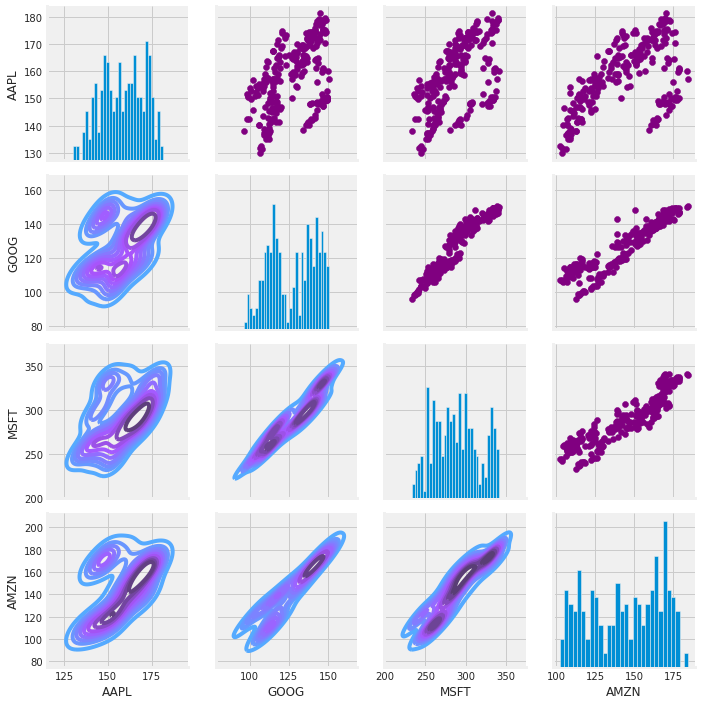

In [34]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

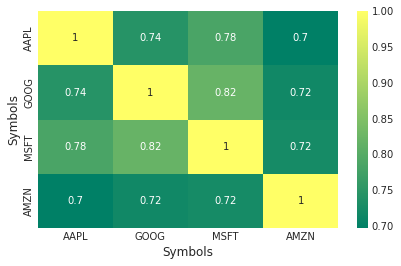

In [35]:
# Let's go ahead and use seabron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

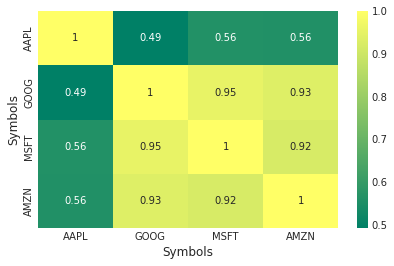

In [36]:
sns.heatmap(closing_df.corr(), annot = True, cmap ='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated

###  How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

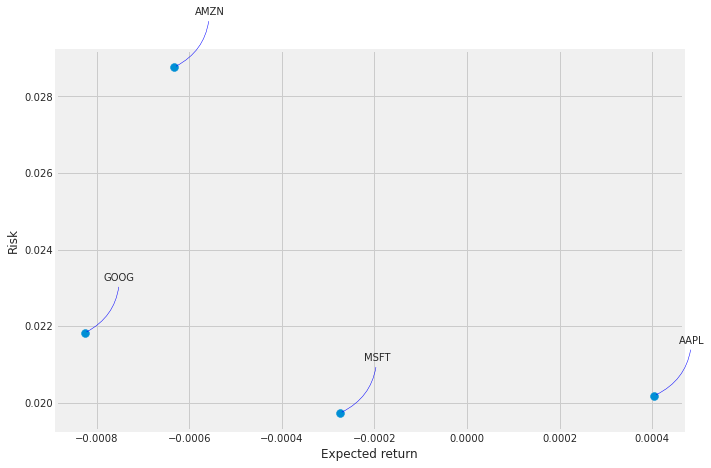

In [37]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

###  Predicting the closing price stock price of APPLE inc:¶ 

In [38]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540046
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607438
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747404
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880665
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860234
...,...,...,...,...,...,...
2022-09-28,150.639999,144.839996,147.639999,149.839996,146691400.0,149.839996
2022-09-29,146.720001,140.679993,146.100006,142.479996,128138200.0,142.479996
2022-09-30,143.100006,138.000000,141.279999,138.199997,124705400.0,138.199997


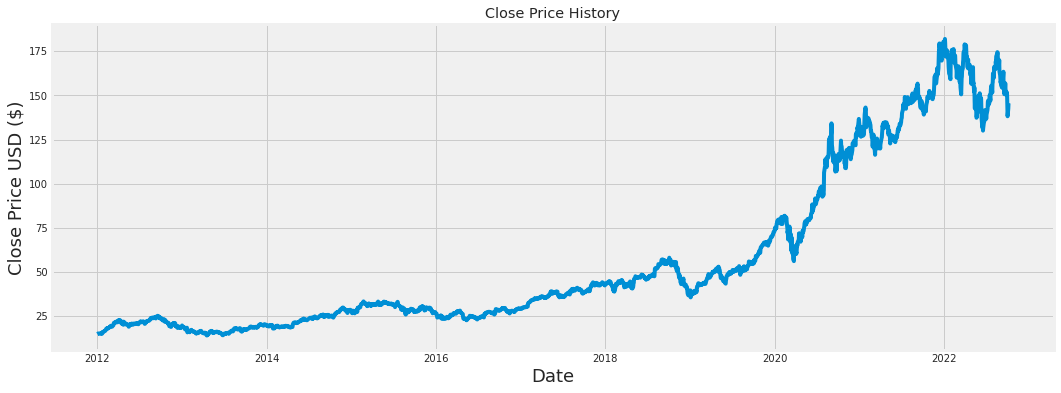

In [39]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [40]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2572

In [41]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.73932317],
       [0.76461139],
       [0.78275878]])

In [42]:
#create the training data set 
#create the scaled training data set 

train_data = scaled_data[0:int(training_data_len),:]
#split the data into x_train and Y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61 :
        print(x_train)
        print(y_train)
        print()
        
#convert the x_train and y_train to numpy arrays 
x_train ,y_train = np.array(x_train),np.array(y_train)

#reshape the data 
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [43]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, LSTM
from keras.models import Sequential

In [44]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2512/2512 [==============================] - 91s 35ms/step - loss: 0.0013


In [45]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 34ms/step


5.552863472066681

/tmp/ipykernel_77231/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


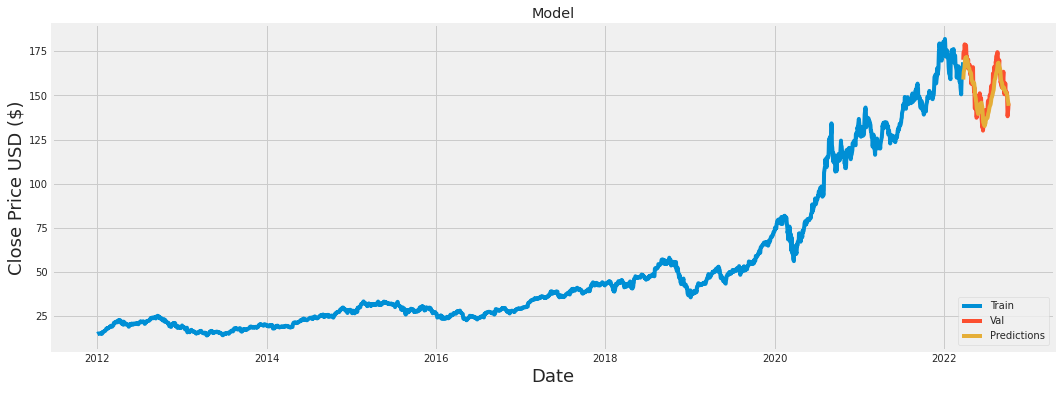

In [46]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [47]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-03-23,170.210007,158.993912
2022-03-24,174.070007,160.968109
2022-03-25,174.720001,163.216385
2022-03-28,175.600006,165.326889
2022-03-29,178.960007,167.183990
...,...,...
2022-09-28,149.839996,150.157608
2022-09-29,142.479996,149.611160
2022-09-30,138.199997,148.109406
